In [5]:
import numpy as np
import params as prm
import matplotlib.pyplot as plt

In [6]:
timesteps = np.arange(-.2, .4, .01)
cluster_all = np.load("/home/alexandre/Documents/Decoding/postprocessing/data/paper_2023_postprocess/cluster_list.npy",allow_pickle = True)
cluster=cluster_all
winsize=.1

In [7]:
Matrice=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_theta.npy")[0]
Scores=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_decoding_theta.npy")[0]
print("(temps, Btheta)",np.shape(Scores))
print("(theta,theta, Btheta)",np.shape(Matrice))

(temps, Btheta) (61, 8)
(theta,theta, Btheta) (12, 12, 8)


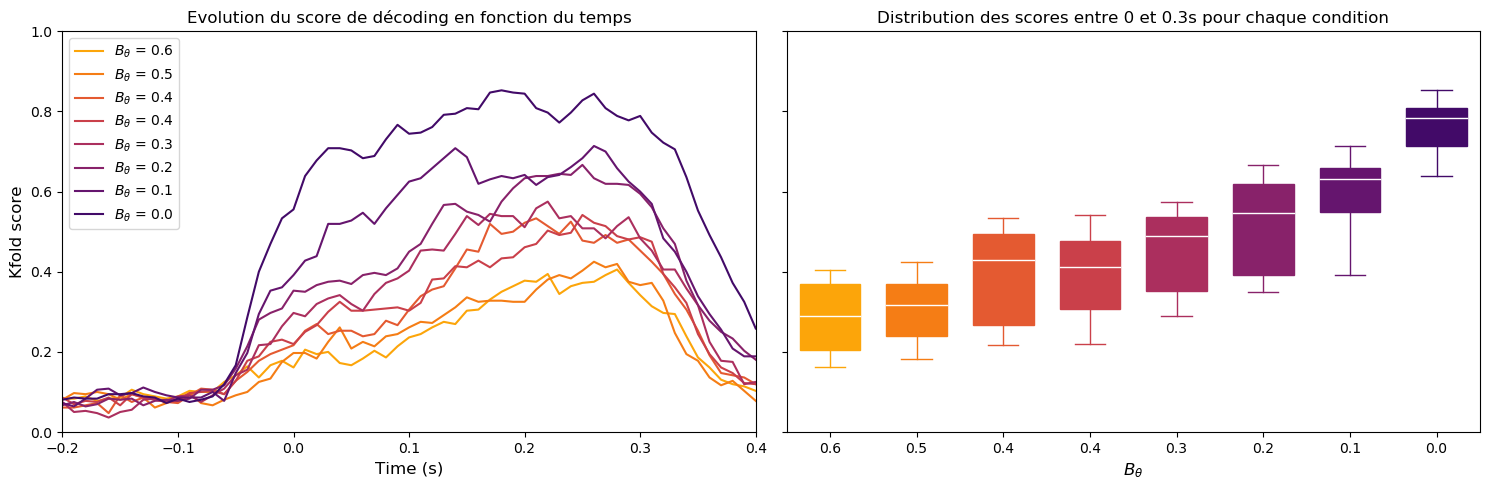

In [8]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
for i in range(len(prm.B_thetas)):
    ax[0].plot(timesteps,Scores[:,i],label=r"$B_{\theta}$ = "+str(round(prm.B_thetas[i],1)),color=prm.colors[i])
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

for i in range(len(prm.B_thetas)):
    ax[1].boxplot(Scores[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=prm.colors[i], color=prm.colors[i]),
                  capprops=dict(color=prm.colors[i]), whiskerprops=dict(color=prm.colors[i]),
                  flierprops=dict(color=prm.colors[i], markeredgecolor=prm.colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(prm.B_thetas[i],1) for i in range(len(prm.B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)
plt.tight_layout()
plt.show()

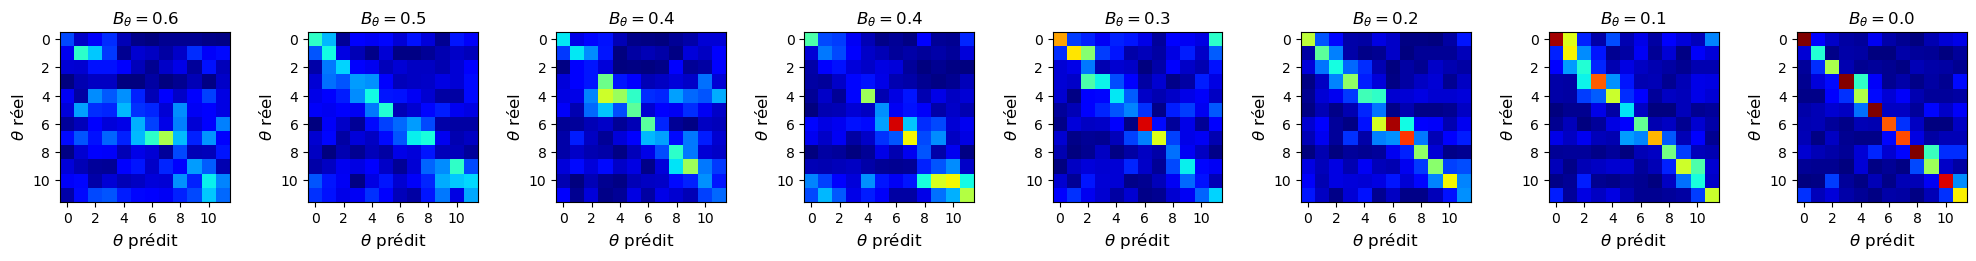

In [9]:
fig,ax=plt.subplots(1,8,figsize=(20,5))
for i in range(len(prm.B_thetas)):
    graph=ax[i].imshow(Matrice[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(prm.B_thetas[i],1)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,11,2))
plt.tight_layout()
plt.show()